<a href="https://colab.research.google.com/github/Pria91/Machine-Learning-Projects-/blob/main/DecisionTreesAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PROJECT - 1: TO CLASSIFY A FLOWER AS ONE OF THE IRIS FLOWER FAMILY***



***Importing the libraries***

In [1]:
import numpy as np                                             #For numerical calculation         
import pandas as pd                                            #For data manipulation 
import matplotlib.pyplot as plt                                #For plotting graphs 
import seaborn as sns

***Lets bring in the data - Iris Data***

In [ ]:
# Iris is a family of flowers, which has 3 categories of flowers - Setosa, Versicolor, Virginica
# Main features are - sepal length, sepal width, petal length and petal width 
# 150 rows/values, 4 features, 3 categories 

In [2]:
dataset = pd.read_csv('Iris.csv')

***Lets explore the data - check what is what***

In [33]:
df = dataset.copy()
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


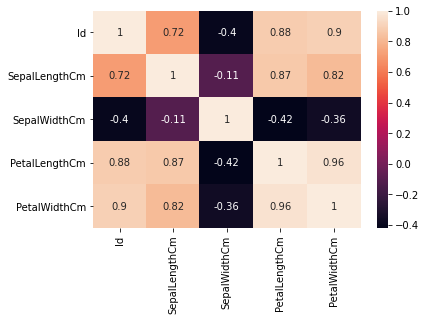

In [8]:
cormat = df.corr()
sns.heatmap(cormat, annot=True)

***OBJECTIVE - To predict what category/classification a given flower belongs to ?***

***To make a prediction, we first have to learn about things like a normal human learning. But, humans can learn color, shapes easily and machines cannot recognize. Hence, numerical values are necessary for a machine to understand!***

***In this particular example, prediction will be based on given features, which category the flower belongs to - 0, 1, 2 - Setosa, Versicolor, Virginica, respectively***

In [10]:
# We will use the last 5 rows of the resampled data as our validation set.
data = df.iloc[0:145]
valid_set = df.iloc[145:150].drop('Species', axis=1)

In [11]:
X = data.drop('Species', axis=1)
y = data['Species']

***We will not use the entire data in making the prediction. We will split our data into train and test. Train data - to train our model (the machine will learn about flower features). Test data - to test our model***

In [7]:
#Splitting the data set into train and test sets. Training data = 70% (0.7), Testing data = 30% (0.3)

In [13]:
# Performing train-test split -
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
#Decision Tree Classifier  - Buidling a Model basically 

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()




#Fitting the training data into the classifier to traub the model 
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
#The above step trains our model i.e. X_train and y_train(features and target/classification).
#After this, the model is well trained to make a prediction on category of an "unknown" flower 

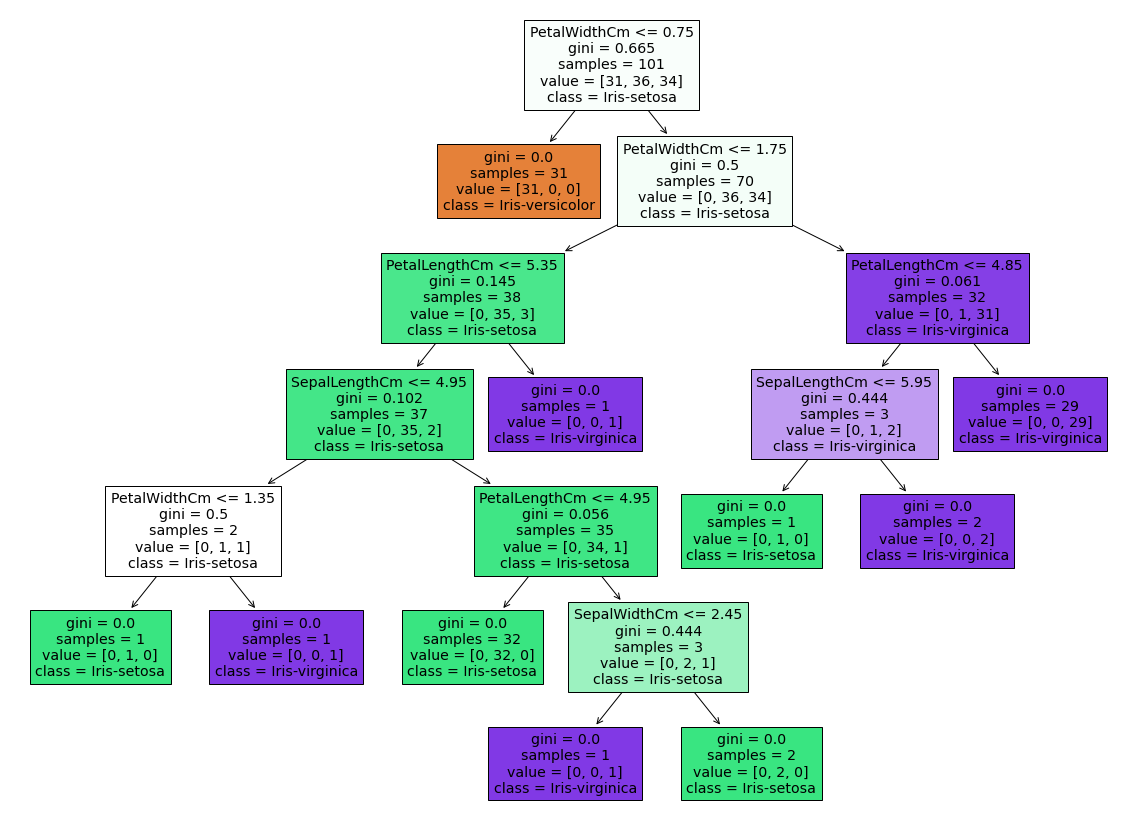

In [29]:
# Visualizing the Decision Tree -
from sklearn import tree
fig = plt.figure(figsize=(20, 15))
tree.plot_tree(dt, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                   class_names=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], filled=True)
plt.show()

In [ ]:
#Checking the model - give a X_test and get y_pred (which, ideally, should match y_test) -> y_test = y_pred

In [26]:
y_pred = dt.predict(X_test)

***Lets find out how well the model is performing***

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [25]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 14]])

In [33]:
accuracy_score(y_test, y_pred)

0.9772727272727273

In [34]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        44
      macro avg       0.98      0.98      0.98        44
   weighted avg       0.98      0.98      0.98        44



In [35]:
# Performing K-Fold Cross Validation -
from sklearn.model_selection import cross_val_score
acc_score = np.mean(cross_val_score(dt, X, y, cv=10)) 
acc_score

0.9585714285714285

***Hyperparameter Tuning***

In [36]:
# Optimizing the parameters using GridSearchCV -

from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3, 4, 5],
           'min_samples_leaf': [1, 2, 3],
           'min_samples_split': [1, 2, 3],
           'max_features': [None, 'auto'] }

grid = GridSearchCV(estimator=dt, param_grid=params, cv=3, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [None, 'auto'],

In [37]:
grid.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [38]:
grid.best_score_

0.9655612244897959

In [39]:
# Now we will again build our classifier model using the optimal parameters that we've obtained -

clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=2, max_features='auto')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
y_pred = clf.predict(X_test)

In [41]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 13]])

In [42]:
accuracy_score(y_test, y_pred)

0.9545454545454546

In [43]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.95        44
      macro avg       0.95      0.95      0.95        44
   weighted avg       0.95      0.95      0.95        44



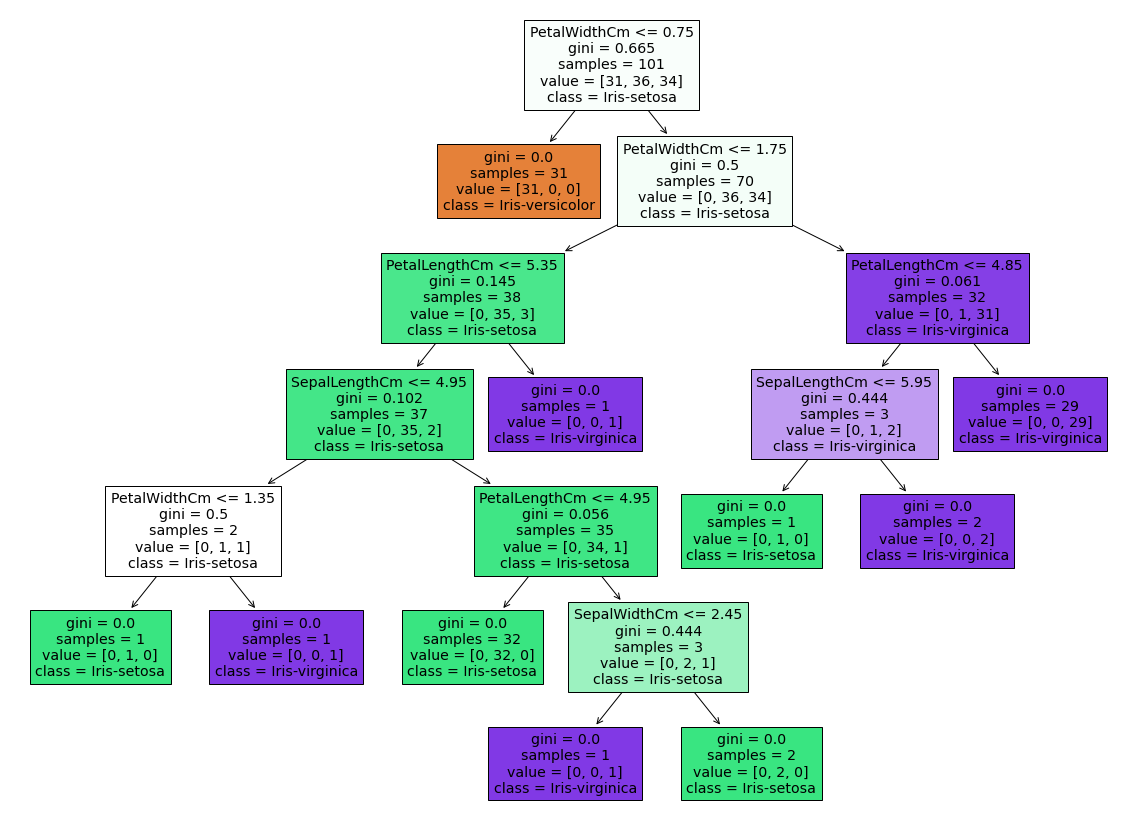

In [44]:
# Visualizing the Decision Tree -
from sklearn import tree
fig = plt.figure(figsize=(20, 15))
tree.plot_tree(dt, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                   class_names=['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], filled=True)
plt.show()

In [45]:
# Testing our model on the validation set -
y_pred = clf.predict(valid_set)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

***PROJECT - 2: TO CLASSIFY BENIGN AND MALIGNANT DATA***

***Breast Cancer Data***

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


X,y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

clf = DecisionTreeClassifier(random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [17]:
predictions = clf.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [18]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [25]:
accuracy_score(predictions,y_test)

0.9473684210526315

In [26]:
accuracy_prcnt = 100*accuracy_score(predictions,y_test)
accuracy_prcnt

94.73684210526315